### Ch.00 : Airline Table

In [1]:
import pandas, warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
air = "airline.csv"

airline = pandas.read_table(air, sep=",", parse_dates=["Month"])

airline.columns = ["Month", "Monthly Passengers"]

airline = airline.set_index("Month").sort_index()

airline.iloc[:5]

,Monthly Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.tail()

,Monthly Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [4]:
airline.index.min(), airline.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [5]:
null = airline.isnull().sum()

null.sum()

0

🚀 Ch.00 Result

Our Airline Table is From January 1949 to December 1960

Our Airline Table is Clear of Missing Value

### Ch.01 : Airline Table Opener

In [6]:
total_airline = airline.shape[0]

total_airline

144

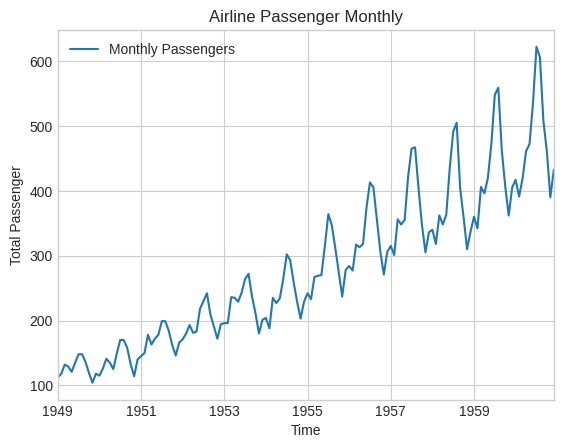

In [7]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

airline.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

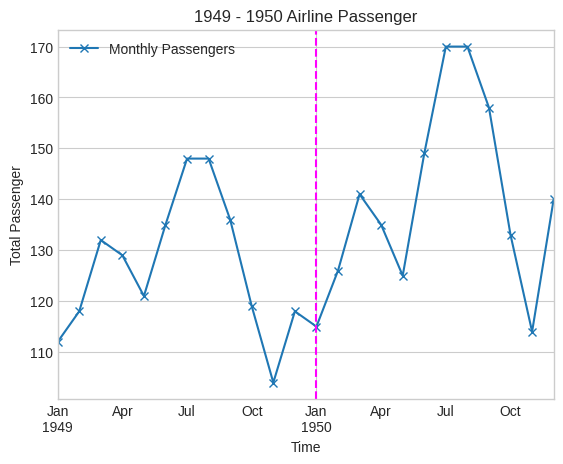

In [8]:
title = "1949 - 1950 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1950-12-31"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

axes.axvline("1950-01-01", color="magenta", linestyle="--");

On 1949 and 1950, There are *Seasonality* on Yearly Basis

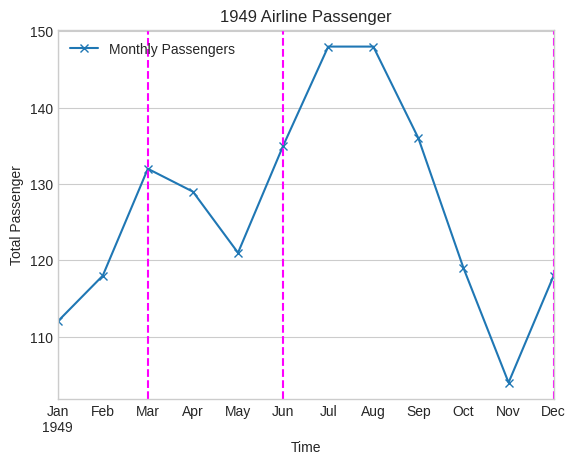

In [9]:
title = "1949 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1949-12-01"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

for lab in ["1949-03", "1949-06", "1949-12"]:

  axes.axvline(lab, color="magenta", linestyle="--")

Our Total Monthly Passengers *Increased on March, June, and December* and *Decreased on May and September*

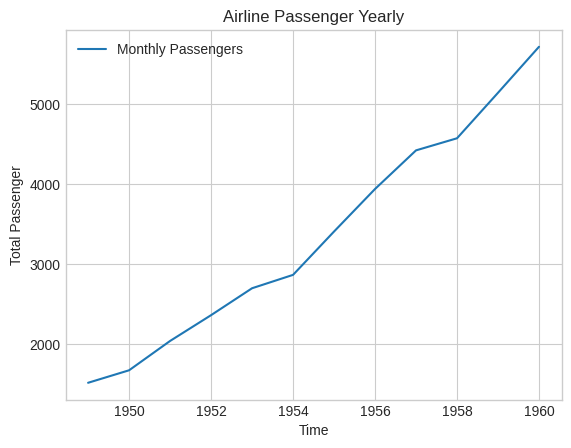

In [10]:
total = airline.groupby(airline.index.year).sum()

title = "Airline Passenger Yearly"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

🚀 Ch.01 Plot Result

Our Airline Table is in January 1949 to December 1960

Over the Years, Our Monthly Total Passengers Trend is *Increasing* and also Having Consistent *Seasonality*

Main Reason on Our Monthly Total Passengers *Seasonality* is *Holiday*

On June to August, *in the Northern Hemisphere is Summer Holiday*. On December, is *Christmas and New Year Eve*

### Ch.02 : Airline Test

In [11]:
from statsmodels.tools.sm_exceptions import ValueWarning

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.simplefilter('ignore', ValueWarning)

airline_report = seasonal_decompose(airline)

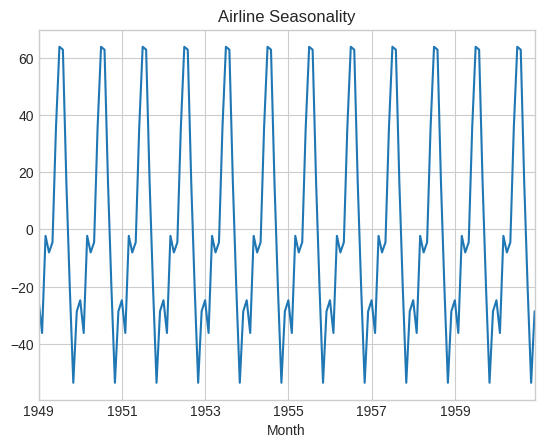

In [12]:
title  = "Airline Seasonality"

airline_report.seasonal.plot(title=title);

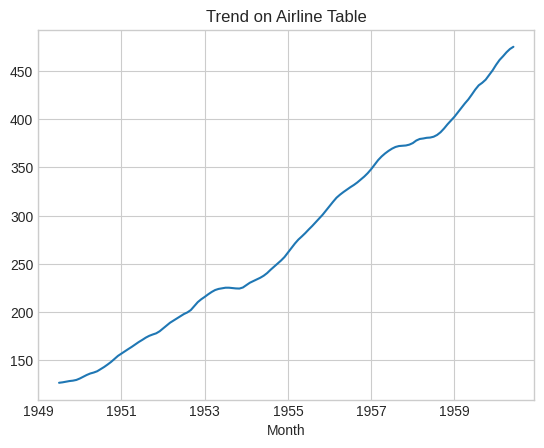

In [13]:
title  = "Trend on Airline Table"

airline_report.trend.plot(title=title);

In [14]:
# First ADF Test

from statsmodels.tsa.stattools import adfuller

test_result, p_value, use_lag, obser, crival, criterion = adfuller(airline)

alpha = 0.05

is_stationar = test_result < alpha

is_stationar, test_result

(False, 0.8153688792060498)

In [15]:
# Other ADF Test

sample_satu = airline.diff().dropna()

test_result, p_value, use_lag, obser, crival, criterion = adfuller(sample_satu)

is_stationar = test_result < alpha

is_stationar, test_result

(True, -2.8292668241700047)

Initially, Our Airline Table *isn't Stationary*. Our Airline *is Stationary at First Order Diff*

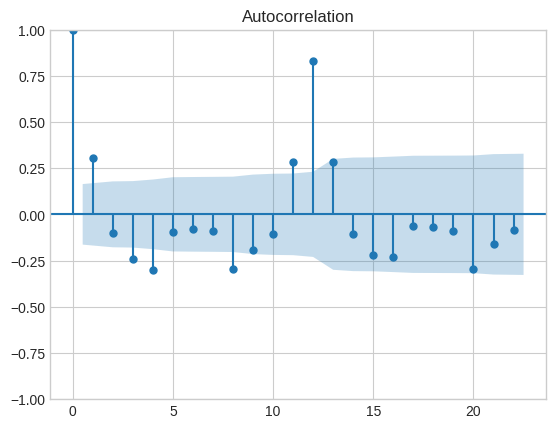

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sample_satu);

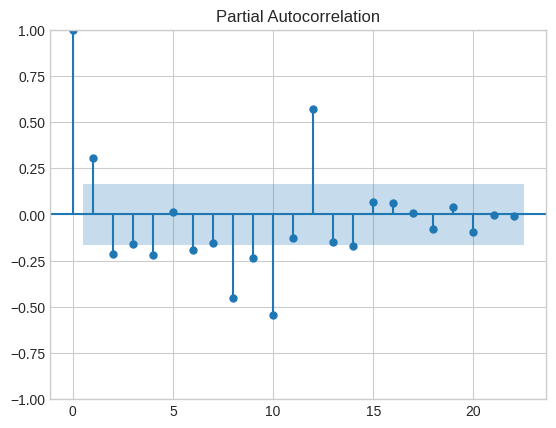

In [17]:
plot_pacf(sample_satu);

🚀 Ch.02 Plot Result

Due to *First Order Diff*, Our *d* Will be 1. Our *p* Will be 1 or 2. Our *q* Will be 1

### Ch.03 : Airline Model

Our Airline Model will Consist of *Arima* and *Seasonal Arima*

#### Ch.03.1 : Arima

In [18]:
import numpy as np

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

class Relplot:
  """
  Helper Plot
  """
  def __init__(self, train, test, logits):
    self.test = test
    self.logits = logits
    self.train = train

  @property
  def Relplot(self):
    fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

    axes[0].plot(self.train, label="Train")
    axes[0].plot(self.test, label="Test")
    axes[0].plot(self.logits, label="Result")
    axes[0].set_title("Overall Result on Forecasting")
    axes[0].legend()

    axes[1].plot(self.test, label="Test")
    axes[1].plot(self.logits, label="Result")
    axes[1].set_title("Detail Result on Forecasting")
    axes[1].legend()

    plt.tight_layout();

In [19]:
train_split = int(0.95 * total_airline)

train = airline.iloc[:train_split]

test = airline.iloc[train_split:]

len(train), len(test)

(136, 8)